In [148]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy.stats import pearsonr

In [149]:
path = os.getcwd() + "\Datasets\\"
print(os.listdir())
df = pd.read_csv("Indicator.csv")
df.head(10)

['.git', '.ipynb_checkpoints', 'Datasets', 'Indicator.csv', 'Pop_Growth.ipynb', 'README.md', 'Unemployment.ipynb']


,Indicator_Code,Indicator_Name
0,SP.POP.GROW,Population Growth (in %)
1,SI.POV.GINI,Gini Index
2,NY.GDP.PCAP.KD.ZG,GDP per capita growth (in %)
3,SE.XPD.TOTL.GB.ZS,"Government expenditure on education, total (% ..."
4,SE.XPD.TOTL.GD.ZS,"Government expenditure on education, total (% ..."
5,SI.DST.FRST.10,Income share held by lowest 10%
6,SI.DST.10TH.10,Income share held by highest 10%
7,SL.UEM.TOTL.ZS,"Unemployment, total (% of labour force) (model..."
8,SP.DYN.CBRT.IN,"Birth Rate, crude (per 1000 people)"
9,SP.DYN.CDRT.IN,"Death Rate, crude (per 1000 people)"


In [150]:
indicator_csvs = [path + i for i in df.Indicator_Code]
df1 = ["\\".join(i.split("\\")) for i in indicator_csvs]
#print(df1)
#To get the Gini Index CSV
unemp = pd.read_csv(df1[7] + "\\" + os.listdir(df1[7])[0])#, sep='delimiter',header=None)#, error_bad_lines=False)

In [151]:
years = [str(i) for i in range(1960,2000)]
#print(years)
try:
    unemp = unemp.drop(columns=years)
except:
    unemp.head(20)

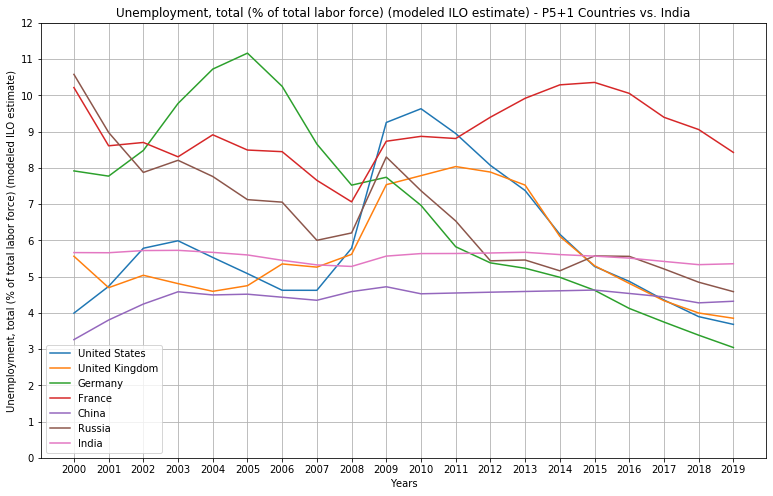

In [175]:
def p5Indicator(df,ymin,ymax,step):
    indicatorName = df["Indicator Name"][0]

    usdf = list(df[df["Country Name"]=="United States"].iloc[0,4:])
    ukdf = list(df[df["Country Name"]=="United Kingdom"].iloc[0,4:])
    gerdf = list(df[df["Country Name"]=="Germany"].iloc[0,4:])
    fradf = list(df[df["Country Name"]=="France"].iloc[0,4:])
    chidf = list(df[df["Country Name"]=="China"].iloc[0,4:])
    rusdf = list(df[df["Country Name"]=="Russian Federation"].iloc[0,4:])
    inddf = list(df[df["Country Name"]=="India"].iloc[0,4:])

    years = list(range(2000,2020))

    plt.figure(figsize=(13,8))
    plt.grid(True)
    plt.xticks(np.arange(min(years),max(years)+1,step=1))
    plt.ylim(ymin,ymax)
    plt.yticks(np.arange(ymin,ymax,step = step))
    plt.plot(years,usdf)
    plt.plot(years,ukdf)
    plt.plot(years,gerdf)
    plt.plot(years,fradf)
    plt.plot(years,chidf)
    plt.plot(years,rusdf)
    plt.plot(years,inddf)
    plt.legend(["United States","United Kingdom","Germany","France","China","Russia","India"])
    plt.title(indicatorName + " - P5+1 Countries vs. India")
    plt.xlabel("Years")
    plt.ylabel(indicatorName)
    plt.show()
    #print(indName)

p5Indicator(unemp,0,12.001,1)

In [176]:
gdpCap = pd.read_csv(df1[2] + "\\" + os.listdir(df1[2])[0])

In [177]:
years = [str(i) for i in range(1960,2000)]
#print(years)
try:
    gdpCap = gdpCap.drop(columns=years)
except:
    gdpCap.head(20)

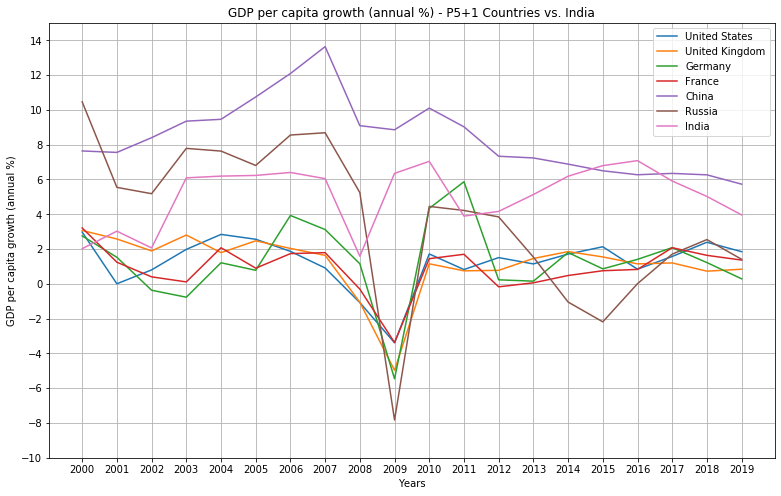

In [178]:
gdpCap.head()
p5Indicator(gdpCap,-10,15,2)

In [174]:
gdpWorld = list(gdpCap[gdpCap["Country Name"]=="World"].iloc[0,4:])
unempWorld = list(unemp[unemp["Country Name"]=="World"].iloc[0,4:])
#print(unempWorld)
coeffCorrelation = pearsonr(gdpWorld,unempWorld)
print("R^2 coefficient for GDP per capita growth and Unemployment :",coeffCorrelation[0])
#gdpWorld.head()
#list(unempWorld.iloc[0,4:])

R^2 coefficient for GDP per capita growth and Unemployment : -0.17366612841584073
